In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('chucks/chuck_0.csv', sep=";")
df = df.drop_duplicates()

In [4]:
df_dropped = df.dropna()

In [5]:
df_motor_stopped = (df_dropped['RS_E_RPM_PC1'] == 0) & (df_dropped['RS_E_RPM_PC2'] == 0)
df_dropped = df_dropped[~df_motor_stopped] 




In [6]:
features = ['RS_E_InAirTemp', 'RS_E_OilPress', 'RS_E_RPM', 'RS_E_WatTemp', 'RS_T_OilTemp']

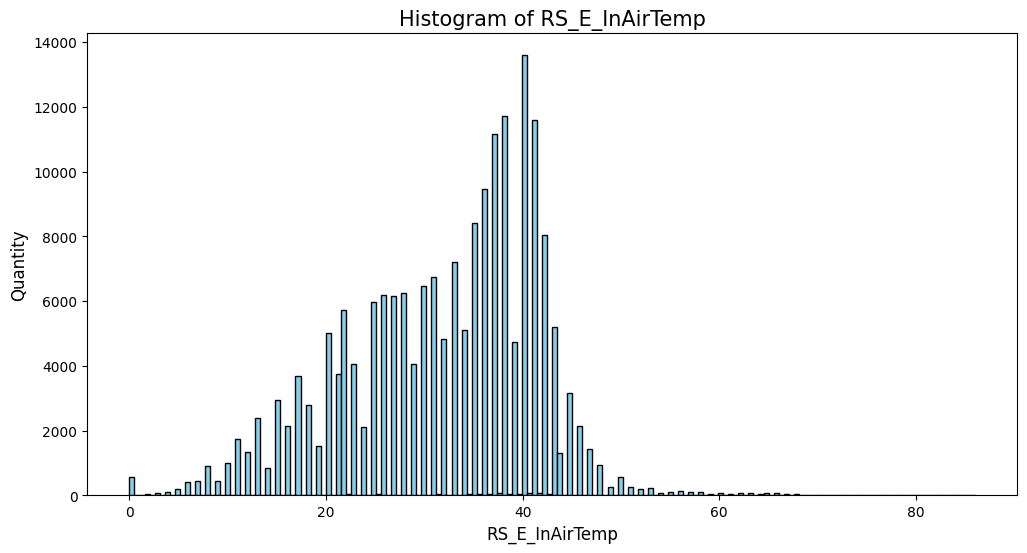

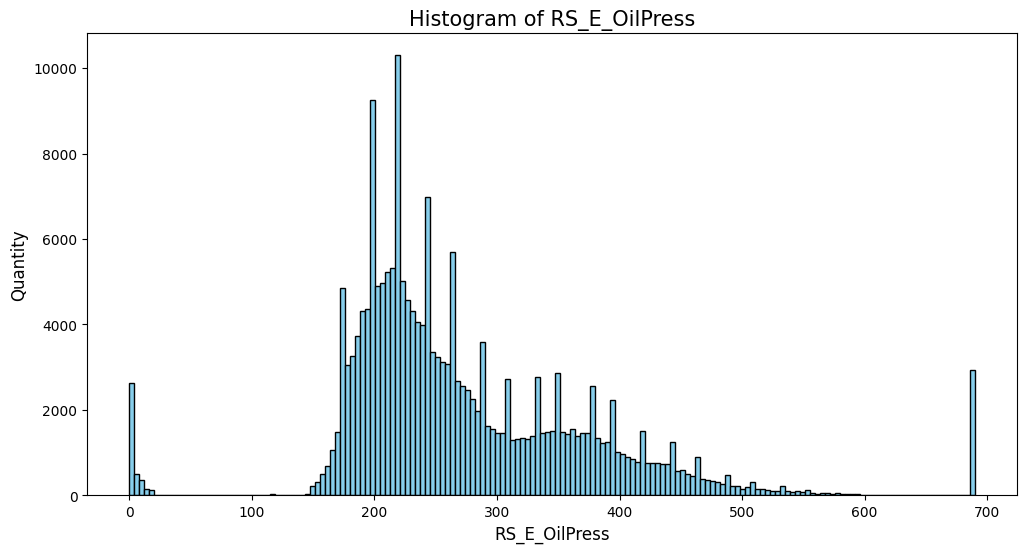

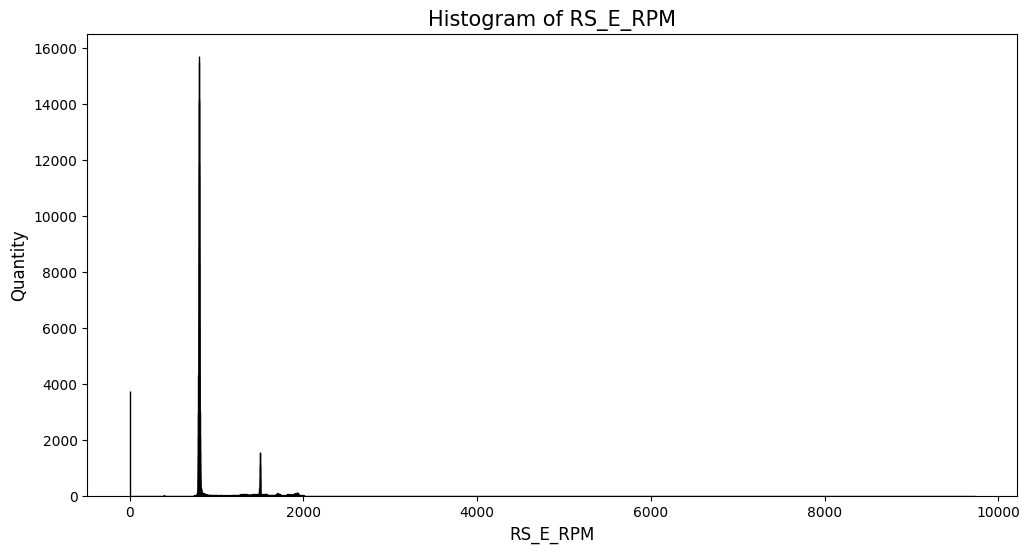

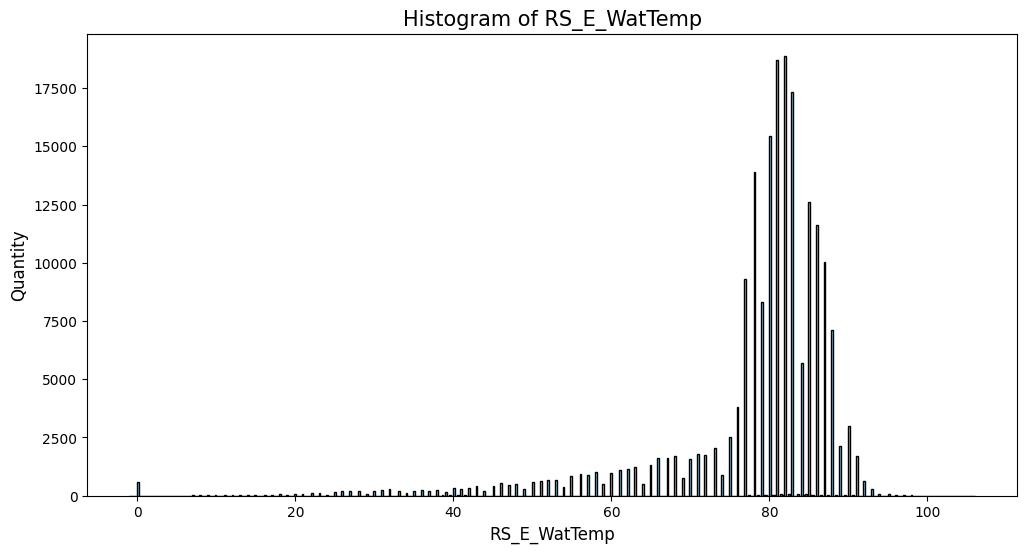

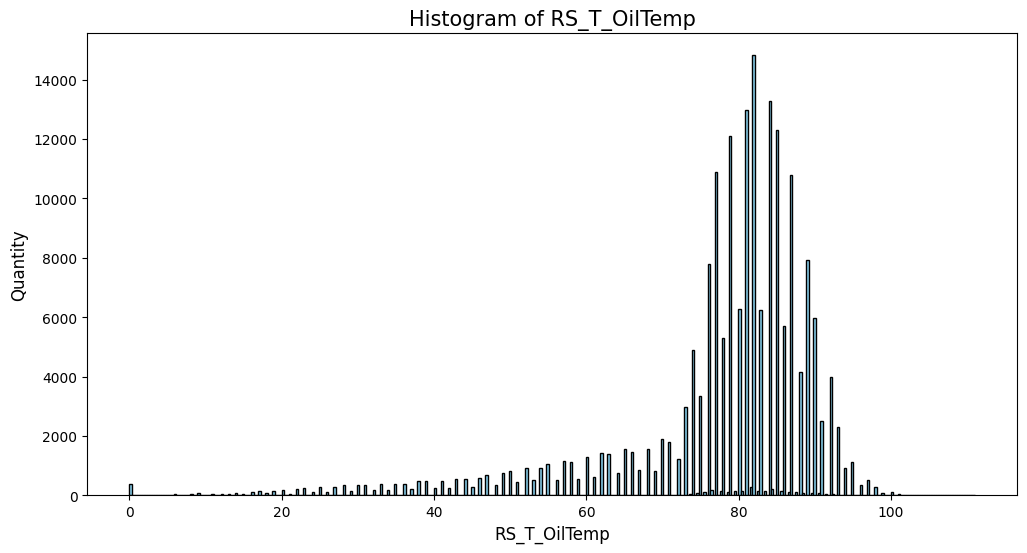

In [8]:
# Create histograms for each type of feature by combining PC1 and PC2 values
for feature in features:
    # Extract PC1 and PC2 values
    pc1_values = df[f'{feature}_PC1']
    pc2_values = df[f'{feature}_PC2']
    combined_values = pd.concat([pc1_values, pc2_values])

    plt.figure(figsize=(12, 6))
    plt.hist(combined_values, bins='auto', color='skyblue', edgecolor='black')

    plt.title(f'Histogram of {feature}', size=15)
    plt.xlabel(feature, size=12)
    plt.ylabel('Quantity', size=12)

    # Show the plot
    plt.show()

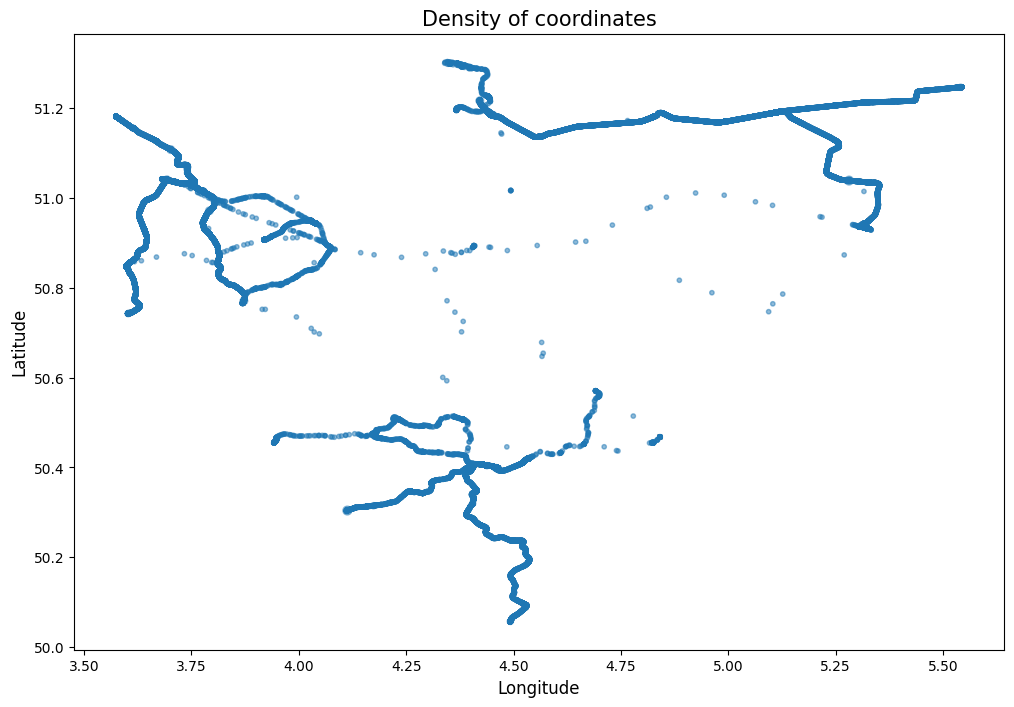

In [10]:
location_counts = df.groupby(['lat', 'lon']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))
plt.scatter(location_counts['lon'], location_counts['lat'], s=location_counts['count']*10, alpha=0.5)

plt.title('Density of coordinates', size=15)
plt.xlabel('Longitude', size=12)
plt.ylabel('Latitude', size=12)

plt.show()